# **Ant Colony Optimization**

Ant Colony Optimization (ACO) is a popular metaheuristic algorithm inspired by the foraging behavior of ants. It's particularly useful for solving combinatorial optimization problems like the Traveling Salesman Problem (TSP). In the TSP, the goal is to find the shortest possible route that visits a set of cities and returns to the origin city.

Here's a simplified Python implementation of ACO for solving the TSP:

Shortest path: [1, 0, 2]
Cost: 5


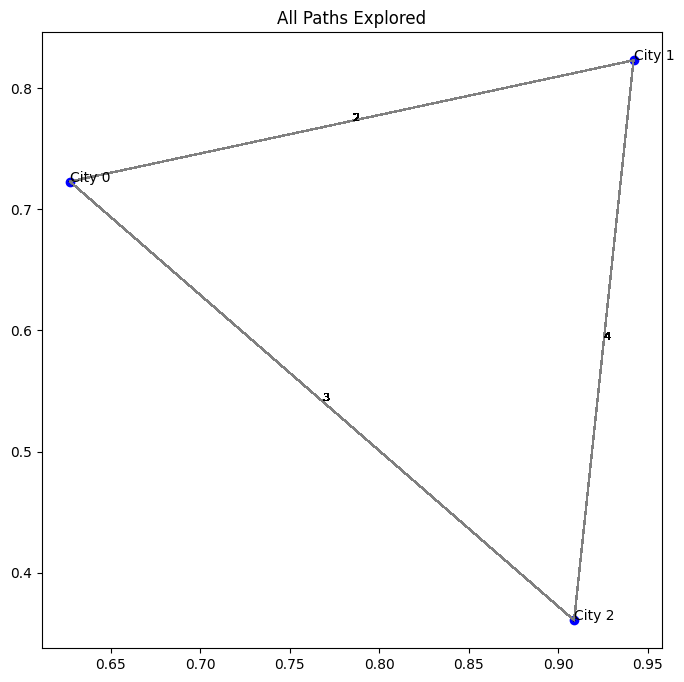

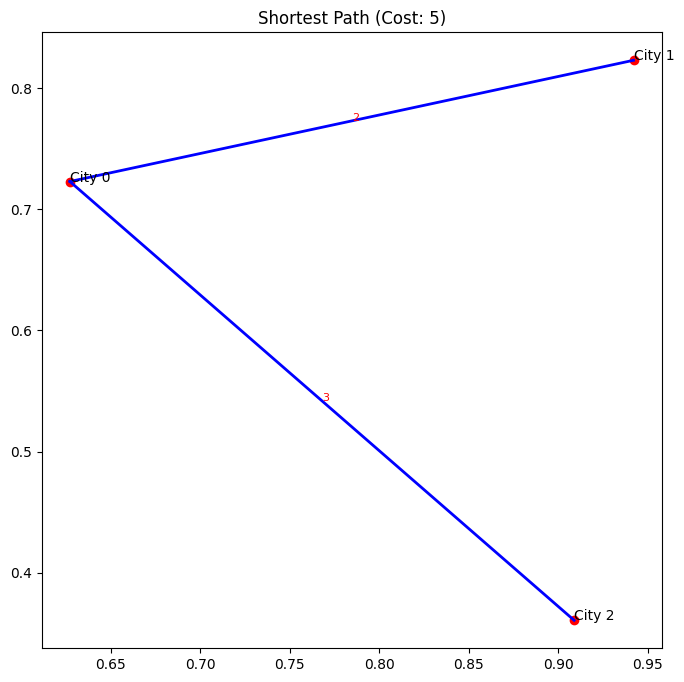

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class AntColonyOptimizer:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        best_cost = float('inf')
        all_paths = []
        for i in range(self.n_iterations):
            paths = self.generate_paths()
            all_paths.extend(paths)
            self.spread_pheromone(paths, self.best_paths(paths))
            best_path_cost, best_path = min((self.path_cost(path), path) for path in paths)
            if best_path_cost < best_cost:
                best_cost = best_path_cost
                shortest_path = best_path
            self.pheromone *= self.decay
        return shortest_path, best_cost, all_paths

    def generate_paths(self):
        paths = []
        for i in range(self.n_ants):
            path = [np.random.randint(len(self.distances))]
            while len(path) < len(self.distances):
                move = self.probabilistic_next_move(path)
                path.append(move)
            paths.append(path)
        return paths

    def probabilistic_next_move(self, current_path):
        last_node = current_path[-1]
        weights = np.copy(self.pheromone[last_node])
        weights[current_path] = 0  # Avoid revisiting cities
        mask = self.distances[last_node] > 0
        weights[mask] /= self.distances[last_node][mask] ** self.beta
        if np.sum(weights) == 0:
            return np.random.choice(self.all_inds)
        normalized_weights = weights / np.sum(weights)
        next_node = np.random.choice(self.all_inds, p=normalized_weights)
        return next_node

    def spread_pheromone(self, paths, best_paths):
        for path_cost, path in best_paths:
            for move in range(len(path) - 1):
                self.pheromone[path[move], path[move + 1]] += 1.0 / path_cost

    def best_paths(self, paths):
        return sorted([(self.path_cost(path), path) for path in paths])[:self.n_best]

    def path_cost(self, path):
        return sum([self.distances[path[i], path[i + 1]] for i in range(len(path) - 1)])

# Example usage
distances = np.array([[0, 2, 3], [2, 0, 4], [3, 4, 0]])
aco = AntColonyOptimizer(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
shortest_path, cost, all_paths = aco.run()

print("Shortest path:", shortest_path)
print("Cost:", cost)

# Plotting all paths
fig, ax = plt.subplots(figsize=(8, 8))
x = np.random.rand(distances.shape[0])
y = np.random.rand(distances.shape[0])

for path in all_paths:
    for i in range(len(path) - 1):
        ax.plot([x[path[i]], x[path[i+1]]], [y[path[i]], y[path[i+1]]], 'grey', alpha=0.5, linewidth=1)
        mid_x, mid_y = (x[path[i]] + x[path[i+1]]) / 2, (y[path[i]] + y[path[i+1]]) / 2
        ax.text(mid_x, mid_y, str(distances[path[i], path[i+1]]), color='black', fontsize=8)

for i, (xi, yi) in enumerate(zip(x, y)):
    ax.scatter(xi, yi, color='blue')
    ax.text(xi, yi, f'City {i}', color='black')

ax.set_title("All Paths Explored")
plt.show()

# Plotting the shortest path
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(shortest_path) - 1):
    ax.plot([x[shortest_path[i]], x[shortest_path[i+1]]], [y[shortest_path[i]], y[shortest_path[i+1]]], 'b-', linewidth=2)
    mid_x, mid_y = (x[shortest_path[i]] + x[shortest_path[i+1]]) / 2, (y[shortest_path[i]] + y[shortest_path[i+1]]) / 2
    ax.text(mid_x, mid_y, str(distances[shortest_path[i], shortest_path[i+1]]), color='red', fontsize=8)

for i, (xi, yi) in enumerate(zip(x, y)):
    ax.scatter(xi, yi, color='red')
    ax.text(xi, yi, f'City {i}', color='black')

ax.set_title(f"Shortest Path (Cost: {cost})")
plt.show()


## **Explanation:**

**Initialization:** The AntColonyOptimizer class is initialized with the distance matrix among cities, and parameters controlling the number of ants, the pheromone decay rate, and the importance of pheromone versus distance.


**Running the Algorithm:** The algorithm runs for a specified number of iterations. In each iteration, each ant generates a path and pheromone is spread on these paths based on their length (better paths receive more pheromone).


**Path Generation:** Paths are generated by each ant probabilistically choosing the next city based on a combination of pheromone level and the inverse of the distance.

**Pheromone Update:** After all ants have built their paths, pheromone on each path is evaporated (multiplied by the decay factor), and then the best paths receive additional pheromone.

**Result:** At the end of the iterations, the best path found across all iterations is returned as the solution.


This example is quite basic and can be enhanced with additional features like local search, more sophisticated pheromone update strategies, or different ways to handle multiple tours.